## test the representation ability of neural network

epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5
epoch :  6
epoch :  7
epoch :  8
epoch :  9
epoch :  10
epoch :  11
epoch :  12
epoch :  13
epoch :  14
epoch :  15
epoch :  16
epoch :  17
epoch :  18
epoch :  19
epoch :  20
epoch :  21
epoch :  22
epoch :  23
epoch :  24
epoch :  25
epoch :  26
epoch :  27
epoch :  28
epoch :  29
epoch :  30
epoch :  31
epoch :  32
epoch :  33
epoch :  34
epoch :  35
epoch :  36
epoch :  37
epoch :  38
epoch :  39
epoch :  40
epoch :  41
epoch :  42
epoch :  43
epoch :  44
epoch :  45
epoch :  46
epoch :  47
epoch :  48
epoch :  49
epoch :  50
epoch :  51
epoch :  52
epoch :  53
epoch :  54
epoch :  55
epoch :  56
epoch :  57
epoch :  58
epoch :  59
epoch :  60
epoch :  61
epoch :  62
epoch :  63
epoch :  64
epoch :  65
epoch :  66
epoch :  67
epoch :  68
epoch :  69
epoch :  70
epoch :  71
epoch :  72
epoch :  73
epoch :  74
epoch :  75
epoch :  76
epoch :  77
epoch :  78
epoch :  79
epoch :  80
epoch :  81
epoch :  82
epoch :  83
epoch :  84
e

epoch :  774
epoch :  775
epoch :  776
epoch :  777
epoch :  778
epoch :  779
epoch :  780
epoch :  781
epoch :  782
epoch :  783
epoch :  784
epoch :  785
epoch :  786
epoch :  787
epoch :  788
epoch :  789
epoch :  790
epoch :  791
epoch :  792
epoch :  793
epoch :  794
epoch :  795
epoch :  796
epoch :  797
epoch :  798
epoch :  799
epoch :  800
epoch :  801
epoch :  802
epoch :  803
epoch :  804
epoch :  805
epoch :  806
epoch :  807
epoch :  808
epoch :  809
epoch :  810
epoch :  811
epoch :  812
epoch :  813
epoch :  814
epoch :  815
epoch :  816
epoch :  817
epoch :  818
epoch :  819
epoch :  820
epoch :  821
epoch :  822
epoch :  823
epoch :  824
epoch :  825
epoch :  826
epoch :  827
epoch :  828
epoch :  829
epoch :  830
epoch :  831
epoch :  832
epoch :  833
epoch :  834
epoch :  835
epoch :  836
epoch :  837
epoch :  838
epoch :  839
epoch :  840
epoch :  841
epoch :  842
epoch :  843
epoch :  844
epoch :  845
epoch :  846
epoch :  847
epoch :  848
epoch :  849
epoch :  850

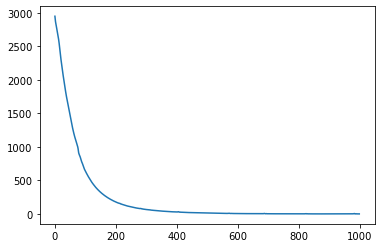

In [10]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

class basic_model(nn.Module):
    
    def __init__(self, neck_len):
        super(basic_model, self).__init__()
        
        self.fc1 = nn.Linear(1,neck_len)
        
        self.rl1 = nn.Tanh()
        
        self.fc2 = nn.Linear(neck_len, neck_len)
        
        self.rl2 = nn.Tanh()
        
        self.fc3 = nn.Linear(neck_len,1)
        
    def forward(self, x):
        
        out = self.rl1(self.fc1(x))
        
        out = self.rl2(self.fc2(out))
        
        out = self.fc3(out)
        
        return out
    
    
SAMPLE_AMOUNT = 100
NECK_LEN = 10
ADAM_LR = 0.05
EPOCHS = 1000

INPUT = np.zeros((SAMPLE_AMOUNT , 1))
OUTPUT = np.zeros((SAMPLE_AMOUNT , 1))
func = lambda x : x**2 + 3*x


data = np.random.uniform(-10,10,SAMPLE_AMOUNT)

output = np.array([func(x) for x in data])

INPUT = np.expand_dims(data,axis=1)

OUTPUT = np.expand_dims(output,axis=1)

train_dataset = TensorDataset(torch.Tensor(INPUT),torch.Tensor(OUTPUT))   
train_loader = DataLoader(train_dataset, shuffle=True, batch_size = SAMPLE_AMOUNT)

model = basic_model(neck_len=NECK_LEN)
optimizer = optim.Adam(model.parameters(), lr = ADAM_LR)
criterion = nn.MSELoss()
training_losses = []

for epo in range(1,EPOCHS+1):
    print("epoch : ",epo)
    for step, (IN, TEST) in enumerate(train_loader):
        OUT = model(IN)
        loss = criterion(OUT,TEST)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        training_losses.append(loss.detach().item())

plt.plot(training_losses)   

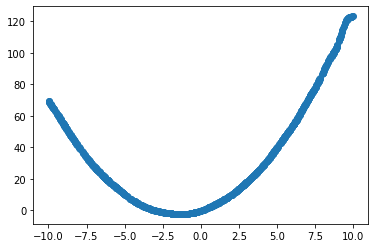

In [11]:
X = np.random.uniform(-10,10,1000)
Y = model(torch.Tensor(np.expand_dims(X,axis=1))).detach().numpy().squeeze()
plt.scatter(X,Y)

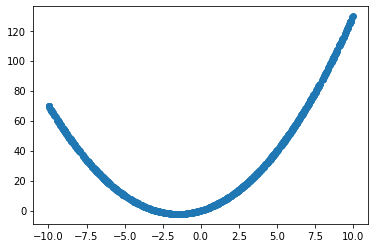

In [12]:
Z = np.array([func(x) for x in X])
plt.scatter(X,Z)

## Generation scheme :
## x \sim Uniform(0,1)^3
## \theta = 0.1 x_1 + 0.2 x_2 + 0.3 x_3 -0.8

In [147]:
import numpy as np

SAMPLE_AMOUNT = 100

ESTI_RANGE = 10

def data_generator(
    SAMPLE_AMOUNT = 100, 
    ESTI_RANGE = 10, 
    var_num = 3,
    paras = np.array([0., 0.3, 0.7]),
    inter = -0.9
):
    X = np.zeros((var_num, SAMPLE_AMOUNT))
    for i in range(var_num):
        X[i] = np.random.uniform(0,1,SAMPLE_AMOUNT)
        
    theta = np.zeros(SAMPLE_AMOUNT)
    
    for i in range(SAMPLE_AMOUNT):
        theta[i] = np.dot(paras, X[:,i]) + inter
        
    P = np.zeros((SAMPLE_AMOUNT, ESTI_RANGE))

    Y = np.zeros((SAMPLE_AMOUNT, ESTI_RANGE))

    for idx in range(SAMPLE_AMOUNT):
        the = theta[idx]
        probs = np.zeros(ESTI_RANGE)
    
        frac = 1
        for i in range(ESTI_RANGE):
            frac *= max(i,1)
        
            probs[i] = np.exp(i * the - np.log(frac))
        
        probs = probs / sum(probs)
            
        P[idx] = probs   
        
        Y_num = np.random.choice(ESTI_RANGE, 1, p=probs)[0]
        Y_vec = np.zeros(ESTI_RANGE)
        Y_vec[Y_num] = 1
        Y[idx] = Y_vec
        
    return (X, theta, P, Y)

x, the, P, y = data_generator()
print(the)
print(P)
# in this way a database is created

[-0.5155736  -0.11773151 -0.30445401 -0.63835266 -0.5075878  -0.23041226
 -0.36721189 -0.60929444 -0.36726777 -0.84564225 -0.21004095 -0.4707838
 -0.45673969 -0.4652761  -0.35116433 -0.15494892 -0.16269963 -0.27965544
 -0.43551427 -0.57094184 -0.76915129 -0.38902321 -0.49786935 -0.40573422
 -0.83359256 -0.16722875 -0.2789156  -0.72504334 -0.76438445 -0.6663844
 -0.43505701 -0.06256171 -0.69601034 -0.71584016 -0.34672818 -0.32678554
 -0.32585385 -0.07236746 -0.09806056 -0.56442218 -0.619856   -0.24001511
 -0.4791439  -0.47254185 -0.32668881 -0.27810114 -0.59908575 -0.13512015
 -0.40891934 -0.11468066 -0.68909129 -0.61691067 -0.24482945 -0.7532174
 -0.55195789 -0.48773618 -0.58654671 -0.35552219 -0.70777314 -0.62337382
 -0.75700687 -0.26806146 -0.54090714 -0.43083731 -0.47594468 -0.75027595
 -0.41790035 -0.42919126 -0.70119058 -0.56129648 -0.00301416 -0.70048246
 -0.27396637 -0.16325271 -0.28504339 -0.19195969 -0.48434889 -0.62554257
 -0.32639001 -0.24769822 -0.66900084 -0.42089138 -0.54

epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5


/var/folders/lm/656r6z6j6w5g65ysx2ssv9q40000gn/T/ipykernel_28852/3868352687.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = self.prob(energy)


epoch :  6
epoch :  7
epoch :  8
epoch :  9
epoch :  10
epoch :  11
epoch :  12
epoch :  13
epoch :  14
epoch :  15
epoch :  16
epoch :  17
epoch :  18
epoch :  19
epoch :  20
epoch :  21
epoch :  22
epoch :  23
epoch :  24
epoch :  25
epoch :  26
epoch :  27
epoch :  28
epoch :  29
epoch :  30
epoch :  31
epoch :  32
epoch :  33
epoch :  34
epoch :  35
epoch :  36
epoch :  37
epoch :  38
epoch :  39
epoch :  40
epoch :  41
epoch :  42
epoch :  43
epoch :  44
epoch :  45
epoch :  46
epoch :  47
epoch :  48
epoch :  49
epoch :  50
epoch :  51
epoch :  52
epoch :  53
epoch :  54
epoch :  55
epoch :  56
epoch :  57
epoch :  58
epoch :  59
epoch :  60
epoch :  61
epoch :  62
epoch :  63
epoch :  64
epoch :  65
epoch :  66
epoch :  67
epoch :  68
epoch :  69
epoch :  70
epoch :  71
epoch :  72
epoch :  73
epoch :  74
epoch :  75
epoch :  76
epoch :  77
epoch :  78
epoch :  79
epoch :  80
epoch :  81
epoch :  82
epoch :  83
epoch :  84
epoch :  85
epoch :  86
epoch :  87
epoch :  88
epoch : 

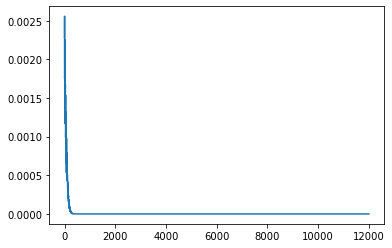

In [148]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

class basic_model(nn.Module):
    
    def __init__(self, neck_len):
        super(basic_model, self).__init__()
        
        self.fc1 = nn.Linear(1,neck_len)
        
        self.rl1 = nn.Tanh()
        
        self.fc2 = nn.Linear(neck_len, neck_len)
        
        self.rl2 = nn.Tanh()
        
        self.fc3 = nn.Linear(neck_len,1)
        
    def forward(self, x):
        
        out = self.rl1(self.fc1(x))
        
        out = self.rl2(self.fc2(out))
        
        out = self.fc3(out)
        
        return out

class exponential_family_model(nn.Module):
    
    def __init__(self, neck_len, esti_range, var_num):
        
        super(exponential_family_model, self).__init__()
        
        self.esti_range = esti_range
        
        self.h_encoder = basic_model(neck_len)
        
        self.x_encoder = nn.Linear(var_num,1)
        # self.x_encoder = nn.Parameter(torch.unsqueeze(torch.Tensor([-0.3]),1))
        
        self.prob = nn.LogSoftmax()
        
    def forward(self,x):
        
        theta = self.x_encoder(x).expand(-1,self.esti_range)
        # theta = self.x_encoder.expand(len(x),self.esti_range)
        
        with torch.no_grad():
            
            potential_vals = torch.unsqueeze(torch.Tensor(list(range(self.esti_range))),-1)

            # hs = self.h_encoder(potential_vals)
            hs = np.zeros(self.esti_range)
            
            frac = 1
            
            for i in range(self.esti_range):
                
                frac *= max(i,1)
                
                hs[i] = np.log(frac)
                
            hs = torch.Tensor(np.expand_dims(hs,axis=0))
        
            potential_vals = torch.transpose(potential_vals,0,1)
        
        energy = theta * potential_vals  - hs
        
        probs = self.prob(energy)
        
        return probs
    
    
    
    
SAMPLE_AMOUNT = 6000
BAT_SIZE = 100
NECK_LEN = 10
ESTI_RANGE = 6
VAR_NUM = 3
ADAM_LR = 0.005
EPOCHS = 200

X, theta, P, Y = data_generator(
    SAMPLE_AMOUNT, 
    ESTI_RANGE,
    var_num = VAR_NUM
)
X = torch.Tensor(X.T)


# train_dataset = TensorDataset(torch.Tensor(X),torch.Tensor(Y))  
train_dataset = TensorDataset(torch.Tensor(X),torch.Tensor(P)) 
train_loader = DataLoader(train_dataset, shuffle=True, batch_size = BAT_SIZE)

model = exponential_family_model(NECK_LEN, ESTI_RANGE, VAR_NUM)
optimizer = optim.Adam(model.parameters(), lr = ADAM_LR)
criterion = nn.KLDivLoss()
training_losses = []

for epo in range(1,EPOCHS+1):
    print("epoch : ",epo)
        
    for step, (IN, TEST) in enumerate(train_loader):
        OUT = model(IN)
        loss = criterion(OUT,TEST)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        training_losses.append(loss.detach().item())

plt.plot(training_losses)

In [149]:
for para in model.x_encoder.parameters():
    print(para)

Parameter containing:
tensor([[-3.0573e-08,  3.0000e-01,  7.0000e-01]], requires_grad=True)
Parameter containing:
tensor([-0.9000], requires_grad=True)


In [101]:
model(X)

/var/folders/lm/656r6z6j6w5g65ysx2ssv9q40000gn/T/ipykernel_28852/2604612601.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = self.prob(energy)


tensor([[9.5557e-01, 4.3426e-02, 9.8675e-04,  ..., 7.5899e-14, 4.3115e-16,
         2.1771e-18],
        [9.5557e-01, 4.3426e-02, 9.8673e-04,  ..., 7.5895e-14, 4.3113e-16,
         2.1769e-18],
        [9.5557e-01, 4.3428e-02, 9.8682e-04,  ..., 7.5919e-14, 4.3128e-16,
         2.1778e-18],
        ...,
        [9.5557e-01, 4.3427e-02, 9.8678e-04,  ..., 7.5909e-14, 4.3122e-16,
         2.1775e-18],
        [9.5557e-01, 4.3427e-02, 9.8681e-04,  ..., 7.5916e-14, 4.3126e-16,
         2.1777e-18],
        [9.5557e-01, 4.3427e-02, 9.8682e-04,  ..., 7.5918e-14, 4.3128e-16,
         2.1778e-18]], grad_fn=<SoftmaxBackward0>)

In [107]:
tt = torch.unsqueeze(torch.Tensor([-0.3]),1)
print(tt.shape)

torch.Size([1, 1])


In [132]:
sum([5.2468e-01, 3.3843e-01, 1.0915e-01, 2.3467e-02, 3.7842e-03, 4.8818e-04])

0.99999938